# Applied Statistics 8651 2025/2026 Module Assignment
## Author: Ebelechukwu Igwagu
### G00439334@atu.ie

In [111]:

# Import Dependencies
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random


# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistical functions
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical modeling
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm


## Problem 1 Lady Testing Tea

Problem 1: Extending the Lady Tasting Tea
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Introduction
The Lady testing tea experiment is an expanded version of R. A fisher's experiment and Ms. Bristol who claimed to be able to tell apart .
one with 8 cups. in the original experiment

In [112]:
# Total Number of cups of tea
total_no_of_cups = 12

# Number of cups of tea with tea in first
no_tea_in_first_cups = 8

# Number of cups of tea with milk in first
no_milk_in_first_cups = 4




### Simulations

### The math comb function
This is used to calculate the number of possibilities of choosing k number of things from a total of n items without repetition and order as described [here](https://docs.python.org/3/library/math.html#math.comb) and a simple use case in [w3school](https://www.w3schools.com/python/ref_math_comb.asp).

$$\binom{n}{k} = 
\frac{n!}{k! (n - k)!}
$$

In [113]:
# Calculating total combinations of choosing 4 cups from 12 using the math.comb function
total_combinations = math.comb(total_no_of_cups, no_milk_in_first_cups)

#show
total_combinations

495

In [114]:
# Total number of ways to choose 4 cups from 12
ways_to_choose_4cups = 12 * 11 * 10 * 9

# Show
ways_to_choose_4cups

11880

In [115]:
# ways to shuffle 4 cups
ways_to_shuffle_4cups = 4 * 3 * 2 * 1

# Show
ways_to_shuffle_4cups

24

### Math.factorial function

In [116]:
# Shuffling can also be calculated using the math.factorial function
ways_to_shuffle_4cups_factorial = math.factorial(4)

# Show
ways_to_shuffle_4cups_factorial

24

In [117]:
# All possible combinations of choosing 4 cups from 12

all_combinations  = ways_to_choose_4cups // ways_to_shuffle_4cups

# Show
all_combinations

495

In [118]:
# Labelling all 12 cups of tea as to order it from 0 to 11
labels = list(range(total_no_of_cups))
print("Labels for all cups of tea:", labels)

Labels for all cups of tea: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [119]:
# Generating different ways of choosing cups of tea with milk in first
combinations = list(itertools.combinations(labels, no_milk_in_first_cups))
# Show
print(combinations[:10])  # Displaying first 10 combinations 

[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7), (0, 1, 2, 8), (0, 1, 2, 9), (0, 1, 2, 10), (0, 1, 2, 11), (0, 1, 3, 4)]


In [120]:
len(combinations)  

495

In [121]:
# show unique combinations and size 
np.unique(combinations, axis=0) 

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       ...,
       [ 7,  8, 10, 11],
       [ 7,  9, 10, 11],
       [ 8,  9, 10, 11]], shape=(495, 4))

explain what the combination, set and random modules are doing

In [122]:
# Choosing 4 cups randomly from the 12 to put milk in  first using the python random selecion`
# https://docs.python.org/3/library/random.html#random.sample

milk_labels = random.sample(labels, no_milk_in_first_cups)

# Sorting th selected labels
milk_labels.sort()

# Show
print("Labels for cups with milk in first:", milk_labels)

Labels for cups with milk in first: [1, 5, 6, 9]


In [123]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(milk_labels)



{1, 5, 6, 9}

In [124]:
# Calculate the overlap of milk labels with all possible combinations
no_milk_label_overlap = []

# Number of combinations to print
max_print = 10

for i, comb in enumerate(combinations):
    # Turn combination and milk_labels into sets
    comb_set = set(comb)
    milk_set = set(milk_labels)

    # Find overlap
    overlap = comb_set.intersection(milk_set)

    # Print only the first `max_print` combinations
    if i < max_print:
        print("Combination:", comb,
              "Length:", len(overlap),
              "Overlap with milk labels:", overlap)

    # Append the size of the overlap to the list
    no_milk_label_overlap.append(len(overlap))


Combination: (0, 1, 2, 3) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 2, 4) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 2, 5) Length: 2 Overlap with milk labels: {1, 5}
Combination: (0, 1, 2, 6) Length: 2 Overlap with milk labels: {1, 6}
Combination: (0, 1, 2, 7) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 2, 8) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 2, 9) Length: 2 Overlap with milk labels: {1, 9}
Combination: (0, 1, 2, 10) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 2, 11) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 3, 4) Length: 1 Overlap with milk labels: {1}


In [125]:
# Show overlaps
print(no_milk_label_overlap)

[1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 4, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 

In [126]:
# Calulate the counts of each overlaps
counts = np.unique(no_milk_label_overlap, return_counts=True)

# Show
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

#### adding bar labels [matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html)

70
224
168
32
1


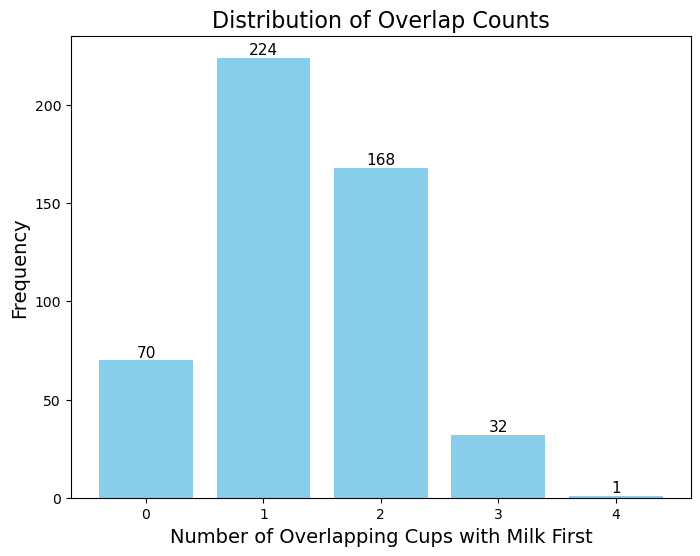

In [127]:
fig, ax = plt.subplots(figsize=(8,6))

# Bar chart
bars = ax.bar(counts[0], counts[1], color='skyblue')

ax.set_xlabel('Number of Overlapping Cups with Milk First', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Overlap Counts', fontsize=16)

# Add the number on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x-position
        height,                               # y-position
        str(height),                           # label text
        ha='center', va='bottom', fontsize=11
    )
    print(bar.get_height())


### Test of Hypothesis

NULL HYPOTHESIS
- The Lady cannot tell the difference between the cups of tea with tea in first versus those with milk in first
- The Lady is randomly choosing the 4 cups of tea frm the 12 at random


ALTERNATE HYPOTHESIS
- The Lady is able to differentiate between the cups of tea with milk in first from those with tea in first

EVIDENCE

### Results

In [128]:
# Probability of selecting the 4 cups with milk in first correctly
probability_correct_selection = 1 / total_combinations

# print
print("Probability of selecting the 4 cups with milk in first correctly:", probability_correct_selection)

Probability of selecting the 4 cups with milk in first correctly: 0.00202020202020202


In [129]:
# Probability of selecting at least 3 cups with milk in first
probability_at_least_3 = (32+1) / total_combinations
# show
probability_at_least_3

0.06666666666666667

In [130]:
# Probability of selecting at least 3 cups with milk in first
probability_at_least_3 = (counts[1][3] + counts[1][4]) / total_combinations
# show
probability_at_least_3

np.float64(0.06666666666666667)

### comparing the 12 to 8 milk_tea_cup experiment

- use the python combination and permutaion for the 8 cups 9999999999999999999999999999999333333333333333333333333333and explain that it does the same as he series of steps above

- https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html

- https://medium.com/random-noise/fishers-exact-test-explained-implementation-in-python-4f186c7e44f6

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.



##### Generating a Random Normal Distribution with [Numpy random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Further explanation is available at [Real python](https://realpython.com/numpy-random-normal/) 


100,000 samples of size 10  was generated using numpy.random.normal, which produces values from a normal distribution centered around a specified mean (loc) and spread according to a specified standard deviation (scale). Size determines the number of values or the shape of the output array.  The default syntax is:

$$numpy.random.normal(loc=0.0, scale=1.0, size=None)$$




In [131]:
numbers = 100_000
sample_size = 10

In [132]:
# random.normal(loc=0.0, scale=1.0, size=None) default
samples = np.random.normal( loc=0.0, scale=1.0, size=(numbers, sample_size))

# Show
samples

array([[ 0.24446603, -0.20869676,  0.46920115, ...,  0.60861379,
        -0.53299533,  0.918171  ],
       [-0.04572219, -0.3536362 ,  1.5297729 , ...,  2.13207264,
         0.21775693,  0.71715996],
       [-0.42120192, -0.81759219,  2.00671547, ..., -0.1153599 ,
        -0.74753871,  1.15043614],
       ...,
       [-1.30717497,  0.97614094,  0.94095551, ..., -0.93121905,
        -0.15177855, -0.30850754],
       [ 0.82787523, -0.71832338,  0.48718858, ..., -0.54561534,
        -0.25349031,  2.10568259],
       [-0.94399585, -0.12190755,  0.70376667, ..., -1.88141693,
        -0.09362465, -1.52922144]], shape=(100000, 10))

In [133]:
sample_means =np.mean(samples, axis=1)

# show
sample_means

array([ 0.27450842,  0.41025174, -0.11091124, ...,  0.16497046,
        0.1468356 , -0.3949551 ], shape=(100000,))

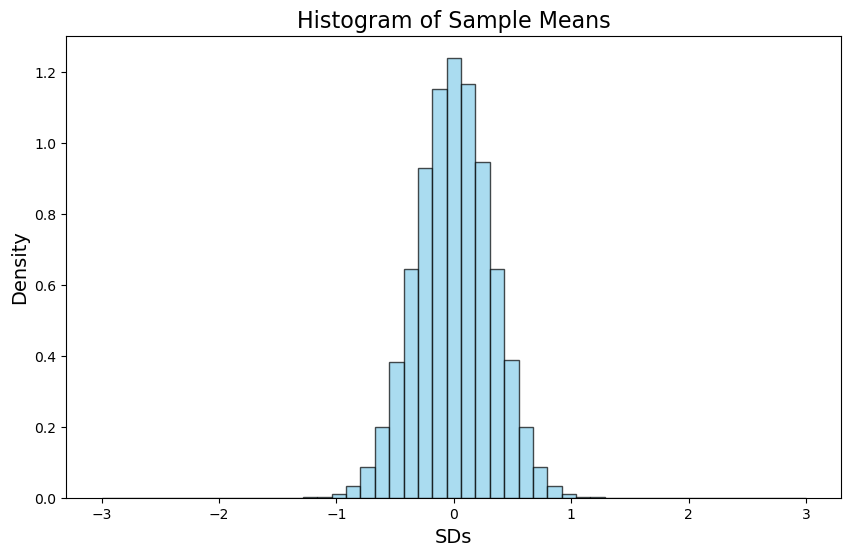

In [134]:
# Creating a histogram of the sample means
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_means, color='skyblue', edgecolor='black', alpha=0.7, density=True, bins=np.linspace(-3, 3, 50))
ax.set_title('Histogram of Sample Means', fontsize=16)
ax.set_xlabel('SDs', fontsize=14)
ax.set_ylabel('Density', fontsize=14)


plt.show()

Additionally, plotting the distribution of sample means with an overlaid normal curve demonstrates the Central Limit Theorem, showing that the sample means approximate a normal distribution even for relatively small sample sizes. 

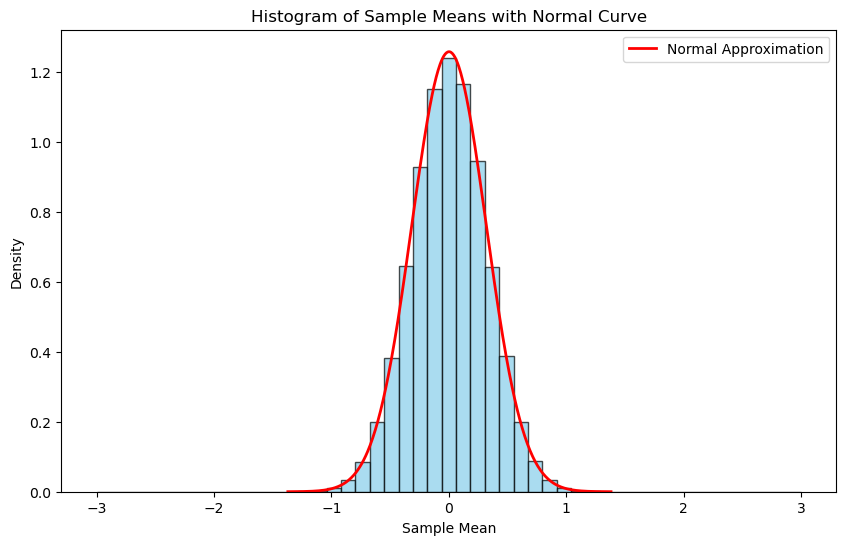

In [135]:
# Creating a histogram of the sample means
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_means, color='skyblue', edgecolor='black', alpha=0.7, density=True, bins=np.linspace(-3, 3, 50))

# Compute mean and SD of the sample means
mean = sample_means.mean()
std = sample_means.std()

# X values for overlay line
x = np.linspace(sample_means.min(), sample_means.max(), 500)

# Overlay normal curve
ax.plot(x, stats.norm.pdf(x, mean, std), 'r-', linewidth=2,
        label='Normal Approximation')

ax.set_title('Histogram of Sample Means with Normal Curve')
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Density')
ax.legend()

plt.show()

####

From this dataset, 100,000 samples of size 10 were drawn, and for each sample, the sample standard deviation (ddof=1) and the population standard deviation (ddof=0) were calculated.  ddof
ddof means degree of freedom ddof=1 is used for calculating the sample standard devaition while ddof=0 is used to calculate the population standard deviation as described by [tidystat](https://tidystat.com/when-to-use-ddof1-in-np-std/) and in the official [numpy.std](https://numpy.org/devdocs/reference/generated/numpy.std.html) documentation.

In [136]:
# Computing the standard deviations using numPy std function
sample_SD = samples.std(axis=1, ddof=1)  # sample SD
population_SD = samples.std(axis=1, ddof=0)  # population SD

# Print
print("First 5 of the Sample Standard Deviations:", sample_SD[:5])
print("First 5 of the Population Standard Deviations:", population_SD[:5])

First 5 of the Sample Standard Deviations: [0.56474736 1.08287591 1.37387882 1.02218774 0.96218764]
First 5 of the Population Standard Deviations: [0.53576638 1.02730629 1.30337589 0.96973244 0.91281135]


#### Comparing the sample SD with the population SD

Comparing the resulting histograms shows that using ddof=0 slightly underestimates the true population variability, while ddof=1 corrects for this bias through Bessel’s correction, accounting for the loss of one degree of freedom when estimating the mean. As the sample size increases, the standard error decreases, and the distributions of both SDs and sample means become narrower, producing more accurate and reliable estimates of the population parameters.

From the few results printed out, the population standardd deviation is slightly lower than the sample standard deviation. PLotting of a histogram is utilized below to see how this spans across the samples

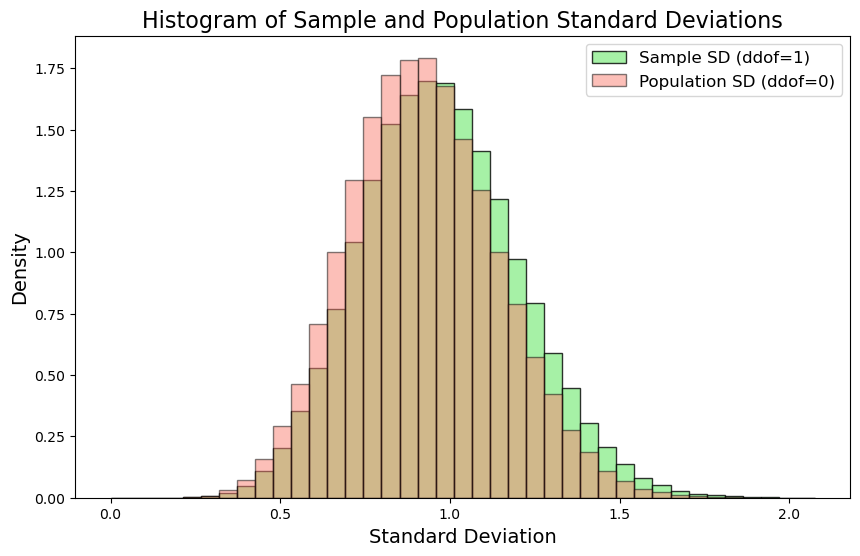

In [137]:
# Define consistent bins for both histograms
bins = np.linspace(0, max(sample_SD.max(), population_SD.max()), 40)

# Plotting the histogram of both sample and population standard deviations
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_SD, color='lightgreen', edgecolor='black', alpha=0.8, density=True,  bins=bins, label='Sample SD (ddof=1)')

ax.hist(population_SD, color='salmon', edgecolor='black', alpha=0.5, density=True, bins=bins, label='Population SD (ddof=0)')

ax.set_title('Histogram of Sample and Population Standard Deviations', fontsize=16)
ax.set_xlabel('Standard Deviation', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(fontsize=12)

plt.show()


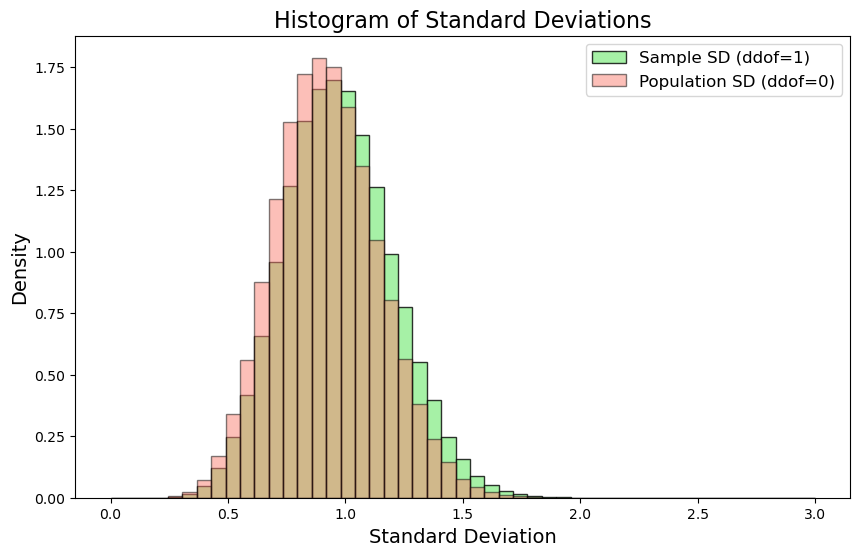

In [138]:
# Plotting the histogram of both sample and population standard deviations
fig, ax = plt.subplots(figsize=(10, 6))   
ax.hist(sample_SD, color='lightgreen', edgecolor='black', alpha=0.8, density=True, bins=np.linspace(0, 3, 50), label='Sample SD (ddof=1)')
ax.hist(population_SD, color='salmon', edgecolor='black', alpha=0.5, density=True, bins=np.linspace(0, 3, 50), label='Population SD (ddof=0)')
ax.set_title('Histogram of Standard Deviations', fontsize=16)               
ax.set_xlabel('Standard Deviation', fontsize=14)
ax.set_ylabel('Density', fontsize=14)   
ax.legend(fontsize=12)
plt.show()
    

From the histogram, the population standard deviation (ddof = 0) is slightly left-shifted compared to the sample standard deviation (ddof = 1), indicating a systematic underestimation of the true population variability. This bias arises because when ddof = 0 is used, the variance is calculated by dividing by N, even though the population mean is unknown and is estimated from the same sample.

In contrast, using ddof = 1 divides by N − 1, which corrects this downward bias. This correction is known as Bessel’s correction. [Bessel’s correction](https://teflpedia.com/Bessel%E2%80%99s_correction#:~:text=Bessel's%20correction%20is%20crucial%20in,by%20estimating%20the%20sample%20mean.)  ensures an unbiased estimate of the population variance by adjusting for the loss of one degree of freedom introduced when the sample mean is used in place of the true population mean.

The difference between the two estimators is most noticeable for small sample sizes (here, n = 10), where the loss of one degree of freedom has a measurable impact. As the sample size increases, the difference between dividing by N and N − 1 becomes negligible, and both estimators converge to the true population standard deviation.

### sampling distribution
impact of incresing sample size on the sample sd and population sd

In [139]:
numbers = 10_000_000
sample_size = 100_000

In [140]:
sample_means =np.mean(samples, axis=1)

# show
sample_means

array([ 0.27450842,  0.41025174, -0.11091124, ...,  0.16497046,
        0.1468356 , -0.3949551 ], shape=(100000,))

In [141]:
# Computing the standard deviations using numPy std function
sample_SD = samples.std(axis=1, ddof=1)  # sample SD
population_SD = samples.std(axis=1, ddof=0)  # population SD

# Print
print("First 5 of the Sample Standard Deviations:", sample_SD[:5])
print("First 5 of the Population Standard Deviations:", population_SD[:5])

First 5 of the Sample Standard Deviations: [0.56474736 1.08287591 1.37387882 1.02218774 0.96218764]
First 5 of the Population Standard Deviations: [0.53576638 1.02730629 1.30337589 0.96973244 0.91281135]


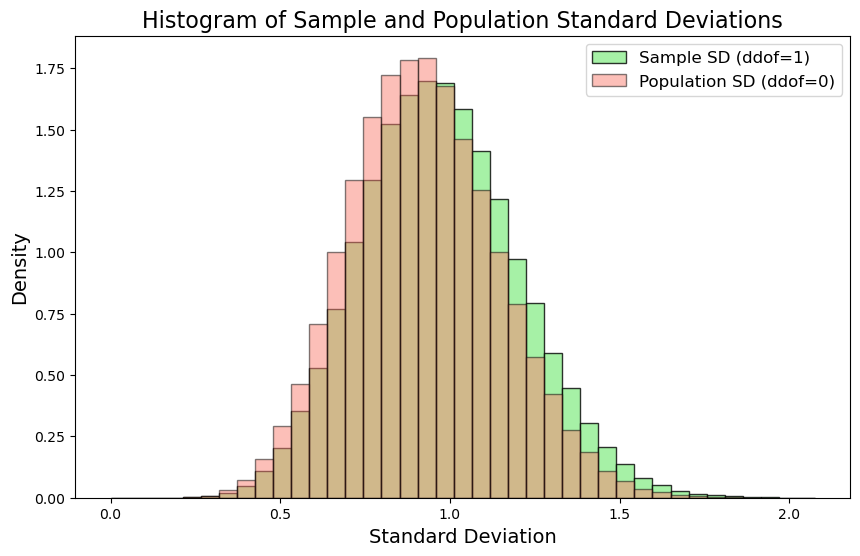

In [142]:
# Define consistent bins for both histograms
bins = np.linspace(0, max(sample_SD.max(), population_SD.max()), 40)

# Plotting the histogram of both sample and population standard deviations
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_SD, color='lightgreen', edgecolor='black', alpha=0.8, density=True,  bins=bins, label='Sample SD (ddof=1)')

ax.hist(population_SD, color='salmon', edgecolor='black', alpha=0.5, density=True, bins=bins, label='Population SD (ddof=0)')

ax.set_title('Histogram of Sample and Population Standard Deviations', fontsize=16)
ax.set_xlabel('Standard Deviation', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(fontsize=12)

plt.show()


### Ref

- https://numpy.org/devdocs/reference/generated/numpy.std.html
- https://www.youtube.com/watch?v=sHRBg6BhKjI

- https://www.youtube.com/watch?v=SzZ6GpcfoQY


## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.



The normal distribution is a continuous probability distribution characterised by a bell shaped curve. It is symmetric in shape, with the mean determining the location of the distribution and the standard deviation determining its spread [Statology](https://www.statology.org/normal-distribution-vs-standard-normal-distribution/). 

The standard normal distribution is a specific case of the normal distribution with a mean of zero and a standard deviation of one.

In this study, the two sample groups used in the independent samples t test are denoted as Group A and Group B. Group A is drawn from the standard normal distribution, while Group B is drawn from a normal distribution with a mean difference d and a standard deviation of one.

In [143]:
alpha = 0.05 # significance level
size = 100 # sample size
simulations = 1000 # number of simulations
ds = np.arange(0, 1.01, 0.1) # mean differences to simulate

# show
ds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [144]:
def simulate_t_test_for_d(d, alpha=0.05):
    not_rejected = 0

    for _ in range(simulations):
        # Group A: standard normal
        group_a = np.random.normal(loc=0.0, scale=1.0, size=size)

        # Group B: normal with mean d
        group_b = np.random.normal(loc=d, scale=1.0, size=size)

        # Independent samples t test
        _, p_value = stats.ttest_ind(group_a, group_b)

        # Fail to reject H0
        if p_value >= alpha:
            not_rejected += 1

    # Type II error rate
    return not_rejected / simulations


In [145]:
type_ii_error_rates = []

for d in ds:
    rate = simulate_t_test_for_d(d, alpha)
    type_ii_error_rates.append(rate)
    print(f"d = {d:.1f}, Type II error rate = {rate:.3f}")


d = 0.0, Type II error rate = 0.942
d = 0.1, Type II error rate = 0.896
d = 0.2, Type II error rate = 0.712
d = 0.3, Type II error rate = 0.435
d = 0.4, Type II error rate = 0.182
d = 0.5, Type II error rate = 0.055
d = 0.6, Type II error rate = 0.012
d = 0.7, Type II error rate = 0.001
d = 0.8, Type II error rate = 0.000
d = 0.9, Type II error rate = 0.000
d = 1.0, Type II error rate = 0.000


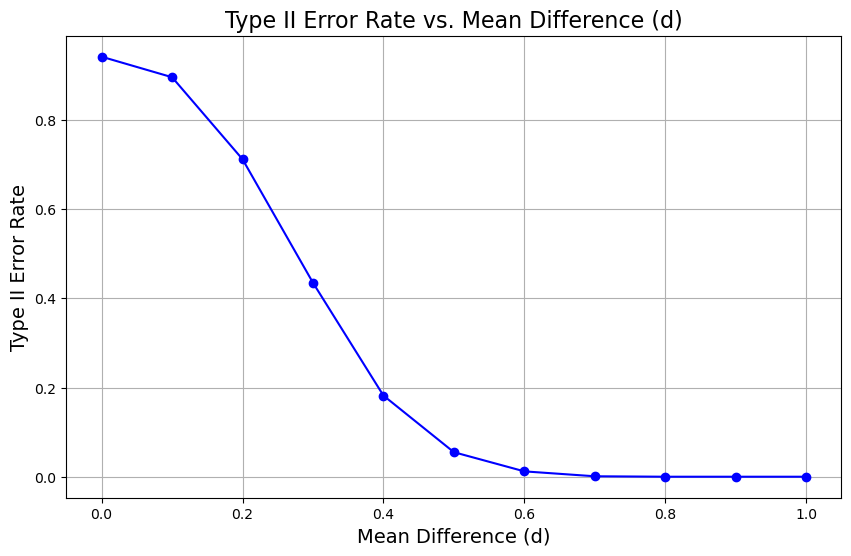

In [146]:
# plotting the type 2 error rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ds, type_ii_error_rates, marker='o', linestyle='-', color='blue')
ax.set_title('Type II Error Rate vs. Mean Difference (d)', fontsize=16)
ax.set_xlabel('Mean Difference (d)', fontsize=14)
ax.set_ylabel('Type II Error Rate', fontsize=14)
ax.grid(True)
plt.show()  


Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

Perform a one-way ANOVA to test whether all three means are equal.
Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
Compare the conclusions.
Write a short note on why ANOVA is preferred over running several t-tests.

In [147]:
# Generating data for ANOVA
# Group A normal distribution    
group_a = np.random.normal(loc=0.0, scale=1.0, size=30)
# Group B normal distribution
group_b = np.random.normal(loc=0.5, scale=1.0, size=30)
# Group C normal distribution
group_c = np.random.normal(loc=1.0, scale=1.0, size=30)

In [148]:
# ANOVA test
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

# show
f_statistic, p_value

(np.float64(7.82586565301162), np.float64(0.0007492976560559656))

In [149]:
def simulate_three_group_ttest(slpha=0.05):
    # Group A normal distribution
    group_a = np.random.normal(loc=0.0, scale=1.0, size=30)
    # Group B normal distribution
    group_b = np.random.normal(loc=0.5, scale=1.0, size=30)
    # Group C normal distribution
    group_c = np.random.normal(loc=1.0, scale=1.0, size=30)

    # perform independent samples t-test
    _, p_value_ab = stats.ttest_ind(group_a, group_b)
    _, p_value_ac = stats.ttest_ind(group_a, group_c)   
    _, p_value_bc = stats.ttest_ind(group_b, group_c)

    # Return the number of rejected null hypotheses
    no_rejections = 0
    if p_value_ab < alpha:
        no_rejections += 1
    if p_value_ac < alpha:
        no_rejections += 1
    if p_value_bc < alpha:
        no_rejections += 1

    return no_rejections

In [150]:
simulations = 1000
total_rejections = 0

# Running simulations
for _ in range(simulations):
    # Check if null hypothesis is rejected
    if simulate_three_group_ttest(alpha) > 0:
        # Increment total rejections
        total_rejections += 1

    # Show the total rejections after all simulations
print(f"Total rejections in {simulations} simulations: {total_rejections}")

Total rejections in 1000 simulations: 973


ANOVA is preferred to running multiple t tests because the later Inflates the Type I error rate and increases the probability of at least one false positive. Whereas, ANOVA controls the Type I error rate at the specified significance level while testing for any difference among group means.